In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('dataset_task1.csv') #datset has been loaded

In [ ]:
df.shape  #dataset has 7043 columns and 21 rows
df.columns #names of columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head() #viewing first 5 rows in the dataset(Churn is the target column)
df.info() #total charges is object(need to convert it)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill NaN with median to avoid missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-595816302.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
if 'customerID' in df.columns:
  df=df.drop('customerID',axis=1)  #ran it twice by mistake

In [ ]:
df.isnull().sum()  #checking null values
df.isna().sum() #checking NaN values
#no imputations required as there are no null or nan values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Keep Churn as 0 or 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Select all categorical columns except 'Churn'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Churn']

# One-hot encode these columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Now df has Churn as 0/1 and all other categorical columns one-hot encoded
print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [ ]:
onehot_cols = ["MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

# Keep only columns that exist
onehot_cols = [col for col in onehot_cols if col in df.columns]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [ ]:
df.head() #Viewing new columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


Churn
0    5174
1    1869
Name: count, dtype: int64


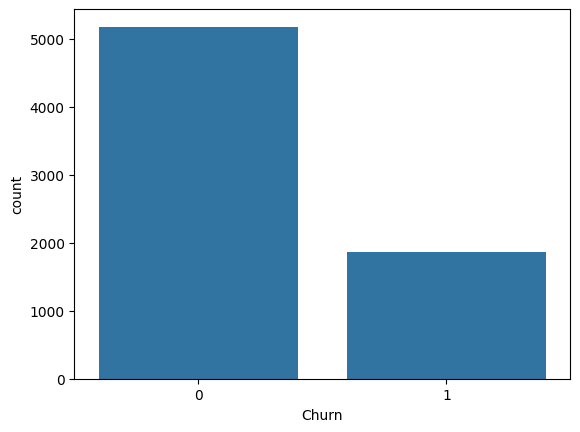

In [ ]:
print(df["Churn"].value_counts())
sns.countplot(x="Churn",data=df)
plt.show()
#The dataset clearly has class imbalance. I will use SMOTE to handle it.

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
# Splitting target and other columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train_res,X_test,y_train_res,y_test=train_test_split(X,y,test_size=0.2)
#splitting dataset: 20% testing ,80% training


In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_res, y_train_res)
#SMOTE will help in adding synthetic data of minority class


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()

# Scaling data before applying ML algorithms
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


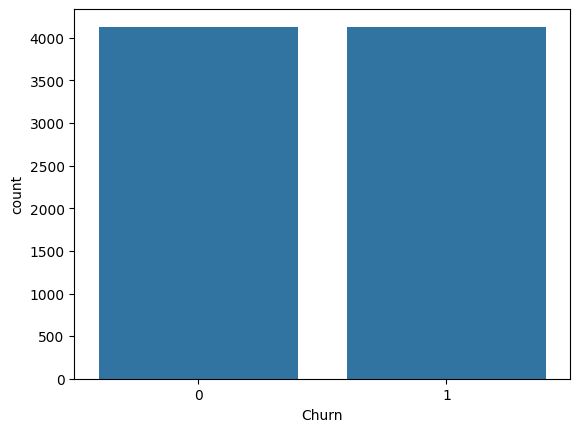

In [ ]:
#final review of dataset

X_train_res
y_train_res
sns.countplot(x=y_train_res,data=df)
plt.show()

In [ ]:
# Using RandomForest Algorithm for bagging

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [None,10, 20,30],         # depth of each tree
    'min_samples_split': [2, 5, 10],         # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # minimum samples at a leaf node
    'max_features': ['auto', 'sqrt']         # number of features considered for split
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

grid_search.fit(X_train_res, y_train_res)

grid_search.best_params_ #gives us the best parameters

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
281 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py",

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
#In the previous cell, I used grid search cv for Hyperparameter tuning and finding the best attributes for our classifier
rf_best = RandomForestClassifier(
   n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_best.fit(X_train_res, y_train_res)
y_pred = rf_best.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(accuracy)
print(f1)
print(cm)
#accuracy is decent, f1 is moderate
#The model predicts non-churn better than churn.


0.7814052519517388
0.5904255319148937
[[879 164]
 [144 222]]


In [ ]:
#Now lets try LDA(Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_res,y_train_res)
y_pred_lda=lda.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred_lda))
print(f1_score(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
#accuracy is almost same as RandomForest. But f1 increased

0.7714691270404542
0.6024691358024692
[[843 200]
 [122 244]]


In [ ]:
#Now lets try QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  #had to add reg_param because f1 was showing value 0, adds a small value to the diagonal of the covariance matrix
qda.fit(X_train_res,y_train_res)
y_pred_qda=qda.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred_qda))
print(f1_score(y_test, y_pred_qda))
print(confusion_matrix(y_test, y_pred_qda))
#accuracy fell off and f1 increased slightly

0.7295954577714692
0.607621009268795
[[733 310]
 [ 71 295]]


In [ ]:
pip install xgboost

In [ ]:
#Now using XGBoost Algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_res,y_train_res)
xgb_pred=xgb.predict(X_test)




In [ ]:
print(accuracy_score(y_test, xgb_pred))
print(f1_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
#good accuracy as well as f1

0.7679205110007097
0.5725490196078431
[[863 180]
 [147 219]]


In [ ]:
pip install scipy

In [ ]:
#Lets try LogistiCRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logreg = LogisticRegression()
param_distributions = {
    'C': uniform(0.01, 10),        # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'class_weight': [None, 'balanced']
}
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=50,            # number of random parameter settings to try
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train_res, y_train_res)
y_pred_lr = random_search.predict(X_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)
print(accuracy)
print(f1)
print(cm)


0.7835344215755855
0.6201743462017435
[[855 188]
 [117 249]]


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # scales numeric features
    ('feature_select', SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=42)
    )),                                              # selects important features
    ('rf', RandomForestClassifier(random_state=42)) # classifier
])


param_grid = {
    'rf__n_estimators': [200, 400, 600],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__min_samples_split': [2, 5, 10],
    'feature_select__threshold': ['median', '1.25*median']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1
)

# Train
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

# Predict on test set
y_pred = grid.predict(X_test)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")


In [ ]:


from sklearn.metrics import classification_report
from xgboost import XGBClassifier


pipeline = Pipeline([
    ('scaler', StandardScaler()),          # optional, helps XGBoost sometimes
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

param_grid = {
    'xgb__n_estimators': [100, 200, 400],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.85, 1],
    'xgb__colsample_bytree': [0.7, 0.85, 1],
    'xgb__gamma': [0, 1, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='f1',     # good for imbalanced datasets
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)


y_pred = grid.predict(X_test)


print("\nClassification Report:\n", classification_report(y_test, y_pred))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ------------------------
# Ensure numeric features
# ------------------------
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# Pipeline
# ------------------------
pipeline_lda = Pipeline([
    ('scaler', StandardScaler()),  # LDA benefits from scaling
    ('lda', LinearDiscriminantAnalysis())
])

# ------------------------
# Hyperparameter grid
# ------------------------
param_grid_lda = {
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 0.1, 0.5, 1]  # only used for lsqr/eigen
}

# ------------------------
# GridSearchCV
# ------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lda = GridSearchCV(
    pipeline_lda,
    param_grid_lda,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Train
grid_lda.fit(X_train, y_train)

# Evaluate
print("Best LDA Parameters:", grid_lda.best_params_)
print("Best CV F1 Score:", grid_lda.best_score_)

y_pred_lda = grid_lda.predict(X_test)
print("\nClassification Report (LDA):\n", classification_report(y_test, y_pred_lda))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lda, cmap="Blues")